In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [76]:
path = '/Users/ginazhou/Documents/GitHub/alli/data/classes'
fs = os.listdir(path)
fs


['2025.xlsx', '2024.xlsx', '2023.xlsx']

In [77]:
tmp = []
for f in fs: 
    tmp.append(pd.read_excel(os.path.join(path, f)))

df = pd.concat(tmp, ignore_index=True)
df.to_csv('classes.csv', index=False)   



In [ ]:
# break down column program title, using | as the delimiter 
df['Program Title'] = df['Program Title'].str.split('|')

# sort the list in the Program Title column
df['Program Title'] = df['Program Title'].apply(lambda x: sorted(x, reverse = True) if isinstance(x, list) else x)


In [79]:

for i in range(6):
    df[f'{i}'] = df[f'Program Title'].apply(lambda x: x[i] if isinstance(x, list) and i < len(x) else '').str.strip()


In [56]:
# there are a few information:
- program title
- program type (metalsmithing, pottery, painting, etc.)
- program level (beginner, intermediate, advanced)
- instructor 


- day (monday to sunday)
- time (start-end time, contains am - pm)
- dates (start-end date)
- seasons (spring, summer, fall, winter)
- year (2023, 2024, 2025) 


SyntaxError: invalid syntax (4168181229.py, line 2)

In [81]:
for i in range(1, 6):
    df[f'{i+6}'] = df[f'{i}'].apply(lambda x: x.split(' ')[0] if x else '')
    df[f'{i}'] = df[f'{i}'].apply(lambda x: ''.join(e for e in x.split(' ')[1:]) if x else '')


In [82]:
df 

,Semester Description,Program Start Date,Program Tuition Fee,Program Title,Primary Contact City,0,1,2,3,4,5,7,8,9,10,11
0,Fall 2024,2024-09-21,395.0,[All Levels Silversmithing with Marla Mencher ...,Hauppauge,All Levels Silversmithing with Marla Mencher,9:30am-1:30pm,2024,,,,Saturdays,Fall,9/21-10/19,,
1,Fall 2024,2024-09-12,397.0,"[Beginner Silversmithing with Marla Mencher , ...",Coram,Beginner Silversmithing with Marla Mencher,12pm-4pm,2024,,,,Thursdays,Fall,9/12-10/17,,
2,Fall 2024,2024-09-10,440.0,[Intermediate Silversmithing with Marla Menche...,Huntington,Intermediate Silversmithing with Marla Mencher,,9:30am-12:30pm,2024,,,9/10-10/15,Tues,Fall,,
3,Fall 2024,2024-09-10,575.0,"[Advanced Silversmithing with Marla Mencher , ...",Roslyn,Advanced Silversmithing with Marla Mencher,1-5pm,2024,,,,Tuesday,Fall,9/10-10/15,,
4,Fall 2024,2024-09-10,575.0,"[Advanced Silversmithing with Marla Mencher , ...",Merrick,Advanced Silversmithing with Marla Mencher,1-5pm,2024,,,,Tuesday,Fall,9/10-10/15,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Summer 2023, Saturda...",Melville,Ceramics Open Studio,2023,12:30-3:30pm,,,,Summer,Saturdays,8/26,,
6974,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Summer 2023, Saturda...",East Northport,Ceramics Open Studio,2023,12:30-3:30pm,,,,Summer,Saturdays,8/26,,
6975,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Summer 2023, Saturda...",Huntington,Ceramics Open Studio,2023,12:30-3:30pm,,,,Summer,Saturdays,8/26,,
6976,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Summer 2023, Saturda...",Huntington Sta,Ceramics Open Studio,2023,12:30-3:30pm,,,,Summer,Saturdays,8/26,,


In [231]:
def clean(row):
    for i in range(0, 12):
        col_name = f'{i}'
        if col_name in row and isinstance(row[col_name], str):
            if any(days in row[col_name] for days in [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
                if 'Mon' in row[col_name]:
                    row['day'] = 'Monday'
                elif 'Tue' in row[col_name]:
                    row['day'] = 'Tuesday'
                elif 'Wed' in row[col_name]:
                    row['day'] = 'Wednesday'
                elif 'Thu' in row[col_name]:
                    row['day'] = 'Thursday'
                elif 'Fri' in row[col_name]:
                    row['day'] = 'Friday'
                elif 'Sat' in row[col_name]:
                    row['day'] = 'Saturday'
                elif 'Sun' in row[col_name]:
                    row['day'] = 'Sunday'
            if '202' in row[col_name]:
                row['year'] = row[col_name]
            if any(season in row[col_name] for season in ['Fall', 'Spring', 'Summer', 'Winter']):
                row['semester'] = row[col_name]
            if 'pm' in row[col_name] or 'am' in row[col_name]:
                row['time'] = row[col_name]

            if any(keyword in row[col_name] for keyword in ['Beginner', 'Intermediate', 'Advanced', 'All']):
                if 'Beginner' in row[col_name]:
                    row['level'] = 'Beginner'
                elif 'Intermediate' in row[col_name]:
                    row['level'] = 'Intermediate'
                elif 'Advanced' in row[col_name]:
                    row['level'] = 'Advanced'
                elif 'All' in row[col_name]:
                    row['level'] = 'All Levels'
            if any(keyword in row[col_name] for keyword in ['Graphic', 'Embroidery', 'Firing', 'Media', 'Spinner', 'Paint', 'Photo', 
                                                            'Illustrat', 'Color', 'Handbuilding', 'Carving', 'Pastel', 'Figure', 'Watercolor', 
                                                            'Wheel', 'Studio', 'smithing', 'Painting', 'Drawing', 'Sewing', 'Pottery', 'Jewelry', 
                                                            'Glass', 'Ceramic', 'Sculpt', 'Paper', 'Craft', 'Textile', 'Visual Arts', 'Art',
                                                            'Print', 'Knitting', 'Portrait', 'Anime', 'Portfolio', 'Ornament', 'Craft', 
                                                            'Silver', 'Mosaic', 'Novel', 'Story', 'Mug', 'Journal', 'Clay', 'Voice', 'Cartoon',
                                                            'Words', 'Mush', 'Metal', 'Acrylics', 'Motion', 'Wax', 'History', 'Enamel', 'Criti'
                                                            'Ring', 'Ink', 'Fire', 'Stamp', 'Meditation', 'Collage', 'Ring', 'Bracelet',
                                                            'Film', 'Button', 'Makeup', 'Pride', 'PRIDE']):
                if 'Sewing' in row[col_name]:
                    row['type'] = 'Textile'
                elif 'Embroidery' in row[col_name]:
                    row['type'] = 'Textile'
                elif 'Knitting' in row[col_name]:
                    row['type'] = 'Textile'
                elif 'Mush' in row[col_name]:
                    row['type'] = 'Textile'

                elif 'Wax' in row[col_name]:
                    row['type'] = 'Wax'

                elif 'PRIDE' in row[col_name]:
                    row['type'] = 'Pride'
                elif 'Pride' in row[col_name]:
                    row['type'] = 'Pride'

                elif 'Criti' in row[col_name]:
                    row['type'] = 'Writing'
                elif 'Words' in row[col_name]:
                    row['type'] = 'Writing'
                elif 'Novel' in row[col_name]:
                    row['type'] = 'Writing'
                elif 'Story' in row[col_name]:
                    row['type'] = 'Writing'
                elif 'Journal' in row[col_name]:    
                    row['type'] = 'Writing'
                elif 'Voice' in row[col_name]: 
                    row['type'] = 'Writing'
                elif 'History' in row[col_name]:    
                    row['type'] = 'Writing'

                elif 'Enamel' in row[col_name]:
                    row['type'] = 'Sculture'



                elif 'Metal' in row[col_name]:
                    row['type'] = 'Jewelry'
                elif 'Ring' in row[col_name]:
                    row['type'] = 'Jewelry'

                elif 'Acrylics' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Motion' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Collage' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Film' in row[col_name]:
                    row['type'] = 'Visual Arts'

 
                    
                elif 'Craft' in row[col_name]:
                    row['type'] = 'Craft'
                elif 'Ornament' in row[col_name]:
                    row['type'] = 'Craft'
                elif 'Print' in row[col_name]:
                    row['type'] = 'Craft' 
                elif 'Paper' in row[col_name]:
                    row['type'] = 'Craft'
                elif 'Stamp' in row[col_name]:
                    row['type'] = 'Craft'
                elif 'Bracelet' in row[col_name]:
                    row['type'] = 'Craft'
                elif 'Button' in row[col_name]:
                    row['type'] = 'Craft'


                elif 'Art' in row[col_name]:
                    row['type'] = 'EVERYTHING'
                elif 'Meditation' in row[col_name]:
                    row['type'] = 'EVERYTHING'
                elif 'Makeup' in row[col_name]:
                    row['type'] = 'Craft'


                elif 'Silver' in row[col_name]:
                    row['type'] = 'Jewelry'
                elif 'Jewelry' in row[col_name]:
                    row['type'] = 'Jewelry'
                elif 'smithing' in row[col_name]:     
                    row['type'] = 'Jewelry'
                elif 'Spinner' in row[col_name]:
                    row['type'] = 'Jewelry'

                elif 'Glass' in row[col_name]:
                    row['type'] = 'Glass'

                elif 'Clay' in row[col_name]:
                    row['type'] = 'Ceramic'
            
                elif 'Mug' in row[col_name]:
                    row['type'] = 'Ceramic'
                elif 'Mosaic' in row[col_name]: 
                    row['type'] = 'Ceramic'
                elif 'Wheel' in row[col_name]:
                    row['type'] = 'Pottery'
                elif 'Ceramic' in row[col_name]:
                    row['type'] = 'Pottery'
                elif 'Pottery' in row[col_name]:
                    row['type'] = 'Pottery'
                elif 'Firing' in row[col_name]:
                    row['type'] = 'Pottery'
                elif 'Fire' in row[col_name]:
                    row['type'] = 'Pottery'

                elif 'Carving' in row[col_name]:
                    row['type'] = 'Sculpture'
                elif 'Sculpt' in row[col_name]:  
                    row['type'] = 'Sculpture'
                elif 'building' in row[col_name]:   
                    row['type'] = 'Sculpture'

                elif 'Ink' in row[col_name]:    
                    row['type'] = 'Visual Arts' 
                elif 'Photo' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Cartoon' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Anime' in row[col_name]:  
                    row['type'] = 'Visual Arts'
                elif 'Portfolio' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Portrait' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Graphic' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Media' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Paint' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Drawing' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Watercolor' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Studio' in row[col_name]:
                    row['type'] = 'Visual Arts' 
                elif 'Figure' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Pastel' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Color' in row[col_name]:
                    row['type'] = 'Visual Arts'
                elif 'Illustrat' in row[col_name]:
                    row['type'] = 'Visual Arts'

    return row


df = df.apply(clean, axis=1)

In [233]:
df['year']=df['Semester Description'].apply(lambda x: x[-4:])
df['semester']=df['Semester Description'].apply(lambda x: x[:-4])
df = df.drop(columns=['semeseter'])

In [239]:
df[df['time'].isnull()]

df#.to_csv('classes_cleaned.csv', index=False)

,0,1,10,11,2,3,4,5,7,8,...,Program Start Date,Program Title,Program Tuition Fee,Semester Description,day,level,semester,time,type,year
0,All Levels Silversmithing with Marla Mencher,9:30am-1:30pm,,,2024,,,,Saturdays,Fall,...,2024-09-21,[All Levels Silversmithing with Marla Mencher ...,395.0,Fall 2024,Saturday,All Levels,Fall,9:30am-1:30pm,Jewelry,2024
1,Beginner Silversmithing with Marla Mencher,12pm-4pm,,,2024,,,,Thursdays,Fall,...,2024-09-12,"[Beginner Silversmithing with Marla Mencher , ...",397.0,Fall 2024,Thursday,Beginner,Fall,12pm-4pm,Jewelry,2024
2,Intermediate Silversmithing with Marla Mencher,,,,9:30am-12:30pm,2024,,,9/10-10/15,Tues,...,2024-09-10,[Intermediate Silversmithing with Marla Menche...,440.0,Fall 2024,Tuesday,Intermediate,Fall,9:30am-12:30pm,Jewelry,2024
3,Advanced Silversmithing with Marla Mencher,1-5pm,,,2024,,,,Tuesday,Fall,...,2024-09-10,"[Advanced Silversmithing with Marla Mencher , ...",575.0,Fall 2024,Tuesday,Advanced,Fall,1-5pm,Jewelry,2024
4,Advanced Silversmithing with Marla Mencher,1-5pm,,,2024,,,,Tuesday,Fall,...,2024-09-10,"[Advanced Silversmithing with Marla Mencher , ...",575.0,Fall 2024,Tuesday,Advanced,Fall,1-5pm,Jewelry,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,Ceramics Open Studio,2023,,,12:30-3:30pm,,,,Summer,Saturdays,...,2023-08-26,"[Ceramics Open Studio , Summer 2023, Saturda...",35.0,Summer 2023,Saturday,NaN,Summer,12:30-3:30pm,Pottery,2023
6974,Ceramics Open Studio,2023,,,12:30-3:30pm,,,,Summer,Saturdays,...,2023-08-26,"[Ceramics Open Studio , Summer 2023, Saturda...",35.0,Summer 2023,Saturday,NaN,Summer,12:30-3:30pm,Pottery,2023
6975,Ceramics Open Studio,2023,,,12:30-3:30pm,,,,Summer,Saturdays,...,2023-08-26,"[Ceramics Open Studio , Summer 2023, Saturda...",35.0,Summer 2023,Saturday,NaN,Summer,12:30-3:30pm,Pottery,2023
6976,Ceramics Open Studio,2023,,,12:30-3:30pm,,,,Summer,Saturdays,...,2023-08-26,"[Ceramics Open Studio , Summer 2023, Saturda...",35.0,Summer 2023,Saturday,NaN,Summer,12:30-3:30pm,Pottery,2023


In [38]:
df.loc[0, '1'].endswith('pm')

True

In [ ]:
df['day'] = df[f'{i}'].apply(lambda x: x.split(' ')[0] if x.startswith('Mon') 
                                                        or x.startswith('Tue') 
                                                        or x.startswith('Wed') 
                                                        or x.startswith('Thu')
                                                        or x.startswith('Fri')
                                                        or x.startswith('Sat')
                                                        or x.startswith('Sun') else '')

In [ ]:
for i in range(6):
    #df['day']  = df[f'{i}'].apply(lambda x: x.split(' ')[0] if x.endswith('pm') or x.endswith('am') else '')
    df['day'] = df[f'{i}'].apply(lambda x: x.split(' ')[0] if x.startswith('Mon') 
                                                        or x.startswith('Tue') 
                                                        or x.startswith('Wed') 
                                                        or x.startswith('Thu')
                                                        or x.startswith('Fri')
                                                        or x.startswith('Sat')
                                                        or x.startswith('Sun') else '')
    df['time'] = df[f'{i}'].apply(lambda x: x.split(' ')[1:] if x.endswith('pm') or x.endswith('am') else '' for i in range(6))


    df['year']   = df[f'{i}'].apply(lambda x: x.split(' ')[-1] if x.endswith('2025') or x.endswith('2024') or x.endswith('2023') else '')
    df['season'] = df[f'{i}'].apply(lambda x: x.split(' ')[0] if x.endswith('2025') or x.endswith('2024') or x.endswith('2023') else '')

    df['age'] = df[f'{i}'].apply(lambda x: x.split(' ')[1] if x.startswith('Ages') else '')

 


ValueError: Columns must be same length as key

In [49]:
df

,Semester Description,Program Start Date,Program Tuition Fee,Program Title,Primary Contact City,0,1,2,3,4,5,day,time,year,season,age
0,Fall 2024,2024-09-21,395.0,[All Levels Silversmithing with Marla Mencher ...,Hauppauge,All Levels Silversmithing with Marla Mencher,Saturdays 9:30am-1:30pm,9/21-10/19,Fall 2024,,,Saturdays,,,,
1,Fall 2024,2024-09-12,397.0,"[Beginner Silversmithing with Marla Mencher , ...",Coram,Beginner Silversmithing with Marla Mencher,Thursdays 12pm-4pm,9/12-10/17,Fall 2024,,,Thursdays,,,,
2,Fall 2024,2024-09-10,440.0,[Intermediate Silversmithing with Marla Menche...,Huntington,Intermediate Silversmithing with Marla Mencher,Tues 9:30am-12:30 pm,9/10-10/15,Fall 2024,,,Tues,,,,
3,Fall 2024,2024-09-10,575.0,"[Advanced Silversmithing with Marla Mencher , ...",Roslyn,Advanced Silversmithing with Marla Mencher,Tuesday 1-5 pm,9/10-10/15,Fall 2024,,,Tuesday,,,,
4,Fall 2024,2024-09-10,575.0,"[Advanced Silversmithing with Marla Mencher , ...",Merrick,Advanced Silversmithing with Marla Mencher,Tuesday 1-5 pm,9/10-10/15,Fall 2024,,,Tuesday,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Saturdays 12:30-3:30p...",Melville,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,,Saturdays,,,,
6974,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Saturdays 12:30-3:30p...",East Northport,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,,Saturdays,,,,
6975,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Saturdays 12:30-3:30p...",Huntington,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,,Saturdays,,,,
6976,Summer 2023,2023-08-26,35.0,"[Ceramics Open Studio , Saturdays 12:30-3:30p...",Huntington Sta,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,,Saturdays,,,,


In [ ]:
a

In [44]:
df.sort_values('age', ascending=False) 

,Semester Description,Program Start Date,Program Tuition Fee,Program Title,Primary Contact City,0,1,2,3,4,5,day,time,year,season,age
0,Fall 2024,2024-09-21,395.0,[All Levels Silversmithing with Marla Mencher ...,Hauppauge,All Levels Silversmithing with Marla Mencher,Saturdays 9:30am-1:30pm,9/21-10/19,Fall 2024,,,,,,,
4648,Fall 2022,2022-10-22,185.0,"[Book and Brush Painting with Rachel Woelfel ,...",East Northport,Book and Brush Painting with Rachel Woelfel,Ages 5-7,Saturdays 11:30am-1:00pm,10/22-11/19,Fall 2022,,,,,,
4659,Fall 2022,2022-11-01,144.0,"[Watercolor for Beginners with Liz Fusco , Tu...",Huntington Station,Watercolor for Beginners with Liz Fusco,Tues 10am-12pm,11/1-11/22,Fall 2022,,,,,,,
4658,Fall 2022,2022-11-03,516.0,"[All Levels Ceramics with Dominic Sparano , T...",Huntington,All Levels Ceramics with Dominic Sparano,Thursdays 9:30 am - 12:30 pm,11/3-12/22,Fall 2022,,,,,,,
4657,Fall 2022,2022-11-10,448.0,[Beginners & Beyond - Ceramics with Amy Tischl...,Central Islip,Beginners & Beyond - Ceramics with Amy Tischler,Thursdays 6-9pm,11/10-12/22,Fall 2022,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,Fall 2023,2023-09-14,360.0,[Metalsmithing Beginner with Dana Neger Lagos ...,Dix Hills,Metalsmithing Beginner with Dana Neger Lagos,Thursday 5:30-8:30 PM,9/14-10/12,Fall 2023,,,,,,,
2321,Fall 2023,2023-09-14,345.0,"[The Painter's Path with David Peikon , Thurs...",Valley Stream,The Painter's Path with David Peikon,Thursdays 10am-1pm,9/14-10/12 Fall 2023,,,,,,,,
2320,Fall 2023,2023-09-19,250.0,[Portfolio Development for Teens with Margaret...,Commack,Portfolio Development for Teens with Margaret ...,Tues 4:00-6:30pm,9/19 - 10/10,Fall 2023,,,,,,,
2319,Fall 2023,2023-10-17,193.0,"[The Magic Of Color with Linda Gottlieb , Age...",Dix hills,The Magic Of Color with Linda Gottlieb,Ages 5-7,Tues 5:00-6:00pm,10/17 - 11/21,Fall 2023,,,,,,


In [41]:
df.to_csv('tmp.csv', index=False)

In [152]:
df['day'] = df['1'].apply(lambda x: x.split(' ')[0] if x.startswith('Mon') 
                                                or x.startswith('Tue') 
                                                or x.startswith('Wed') 
                                                or x.startswith('Thu')
                                                or x.startswith('Fri')
                                                or x.startswith('Sat')
                                                or x.startswith('Sun') else x)
df['time'] = df['1'].apply(lambda x: ' '.join(x.split(' ')[1:]) if (x.endswith('pm') or x.endswith('am')) else x)
#df = df.drop(columns=['Program Title', '1'])

In [162]:
df[df['day']==''][['0']]

,0
177,Art Club: Memories of Summer Pt. 2 with Teresa...
398,Art Club: Memories of Summer Pt. 1 with Teresa...
399,Art Club: Memories of Summer Pt. 2 with Teresa...
439,Art Club: Memories of Summer Pt. 1 with Teresa...
440,Art Club: Memories of Summer Pt. 2 with Teresa...
...,...
4608,Luminous Landscapes of the Mind: An Evening wi...
4788,Artist Couples: An Art Talk with Debbie Wells ...
4800,Artist Couples: An Art Talk with Debbie Wells ...
4802,Artist Couples: An Art Talk with Debbie Wells ...


In [166]:
df['year'] = df['3'].apply(lambda x: x[:-4] if isinstance(x, str) else '')
df['season'] = df['3'].apply(lambda x: x[-4:] if isinstance(x, str) else '')
df = df.drop(columns=['3']) 


In [168]:
df.year.value_counts()


year
Spring     2486
Fall       1589
           1151
Summer      825
5:30-7:      45
           ... 
4/18          1
1/9-          1
2/20-         1
6/5-          1
5:45-7:       1
Name: count, Length: 100, dtype: int64

In [141]:
df[df['4']!='']
df['year'] = df['4'].apply(lambda x: x[:-4] if isinstance(x, str) and x!='' and x[0].isalpha() else '')
df['season'] = df['4'].apply(lambda x: x[-4:] if isinstance(x, str) and x!='' and x[0].isalpha() else '')


In [144]:
df[df['5']!='']
df['year'] = df['4'].apply(lambda x: x[:-4] if isinstance(x, str) and x!='' and x[0].isalpha() else '')
df['season'] = df['4'].apply(lambda x: x[-4:] if isinstance(x, str) and x!='' and x[0].isalpha() else '')



In [146]:
df['8']

0         Fall 
1         Fall 
2         Fall 
3         Fall 
4         Fall 
         ...   
6973    Summer 
6974    Summer 
6975    Summer 
6976    Summer 
6977    Summer 
Name: 8, Length: 6978, dtype: object

In [138]:
df.to_csv('/Users/ginazhou/Documents/GitHub/alli/data/classes_aggr.csv', index=False)

array(['Fall 2024', '5:30-7:00pm', '9/14 - 10/19', '9/11-10/16',
       '9/14-10/19', '9/12-10/17', '', '10/26-11/16', '10/24-11/21',
       '10/23-11/20', '11/23-12/21', '11/26-12/17', 'Spring 2025',
       '12/4-12/18', '12/5-12/19', '1/7-2/11', '2/25-4/8', '1/11-2/15',
       '3/8-4/19', '1/9 - 2/13', '1/8 - 2/12', '3/1-4/12', '4/22-5/27',
       '2/25 - 4/8', '2/27 - 4/10', '2/26-4/9', '4/24 - 5/29',
       '4/22 - 5/27', '10am - 3pm', 'Summer 2025', '4/26-5/31',
       'Summer 2024', '4-5:30pm', '5:45-7:15pm', '6/5-7/10', '6/4-7/9',
       '7/12-8/23', 'Fall 2023', '9/19-10/10', '9/11-11/27', '9/23-10/21',
       '9/13-10/11', '9/19- 10/10', '11/4-12/16', '10/17-11/21',
       '10/31, 11/14, 11/21', '10/17- 11/21', '10/17 - 11/21', '10/25',
       '9/27', '10/25 - 11/22', '11/28 - 12/19', '10/31-12/12',
       '10/31- 12/12', 'Spring 2024', '1/9-1/30', 'Winter 2024',
       '1/13-1/27', '2/7-3/20 Spring 2024', '2/8-3/21', '2/10-3/23',
       '1/9- 1/30', '2/6-3/19', '2/6- 3/19', '

In [95]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [98]:
df['1'] = df['1'].str.split(' ')


In [100]:
df['1'].unique

<bound method Series.unique of 0       [Saturdays, 9:30am-1:30pm]
1            [Thursdays, 12pm-4pm]
2         [Tues, 9:30am-12:30, pm]
3               [Tuesday, 1-5, pm]
4               [Tuesday, 1-5, pm]
                   ...            
6973     [Saturdays, 12:30-3:30pm]
6974     [Saturdays, 12:30-3:30pm]
6975     [Saturdays, 12:30-3:30pm]
6976     [Saturdays, 12:30-3:30pm]
6977     [Saturdays, 12:30-3:30pm]
Name: 1, Length: 6978, dtype: object>

,Semester Description,Program Start Date,Program Tuition Fee,Program Title,Primary Contact City,0,1,2,3,4,5
0,Fall 2024,2024-09-21,395.0,NaN,Hauppauge,All Levels Silversmithing with Marla Mencher,Saturdays 9:30am-1:30pm,9/21-10/19,Fall 2024,,
1,Fall 2024,2024-09-12,397.0,NaN,Coram,Beginner Silversmithing with Marla Mencher,Thursdays 12pm-4pm,9/12-10/17,Fall 2024,,
2,Fall 2024,2024-09-10,440.0,NaN,Huntington,Intermediate Silversmithing with Marla Mencher,Tues 9:30am-12:30 pm,9/10-10/15,Fall 2024,,
3,Fall 2024,2024-09-10,575.0,NaN,Roslyn,Advanced Silversmithing with Marla Mencher,Tuesday 1-5 pm,9/10-10/15,Fall 2024,,
4,Fall 2024,2024-09-10,575.0,NaN,Merrick,Advanced Silversmithing with Marla Mencher,Tuesday 1-5 pm,9/10-10/15,Fall 2024,,
...,...,...,...,...,...,...,...,...,...,...,...
6973,Summer 2023,2023-08-26,35.0,NaN,Melville,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,
6974,Summer 2023,2023-08-26,35.0,NaN,East Northport,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,
6975,Summer 2023,2023-08-26,35.0,NaN,Huntington,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,
6976,Summer 2023,2023-08-26,35.0,NaN,Huntington Sta,Ceramics Open Studio,Saturdays 12:30-3:30pm,8/26,Summer 2023,,


In [97]:
df['Semester Description'].unique()

array(['Fall 2024', 'Spring 2025', 'SAA 2025',
       'Art in The Parking Lot 2025', 'Summer 2025', 'Fall 2023',
       'Winter 2023-24', 'Spring 2024', 'SAA 2024', 'Summer 2024',
       'Fall 2022', 'Spring 2023', 'SAA 2023', 'Summer 2023'],
      dtype=object)

In [77]:
df = df.rename(columns={
    '0': 'program_name',
    '1': 'day_time',
    '2': 'duration'})

In [80]:
df.drop(columns=['Program Title', '3', 'day_time'], inplace=True)

In [81]:
df

,Semester Description,Program Start Date,Program Tuition Fee,Primary Contact City,program_name,duration,day,time
0,Fall 2024,2024-09-21,395.0,Hauppauge,All Levels Silversmithing with Marla Mencher,9/21-10/19,Saturdays,9:30am-1:30pm
1,Fall 2024,2024-09-12,397.0,Coram,Beginner Silversmithing with Marla Mencher,9/12-10/17,Thursdays,12pm-4pm
2,Fall 2024,2024-09-10,440.0,Huntington,Intermediate Silversmithing with Marla Mencher,9/10-10/15,Tues,9:30am-12:30 pm
3,Fall 2024,2024-09-10,575.0,Roslyn,Advanced Silversmithing with Marla Mencher,9/10-10/15,Tuesday,1-5 pm
4,Fall 2024,2024-09-10,575.0,Merrick,Advanced Silversmithing with Marla Mencher,9/10-10/15,Tuesday,1-5 pm
...,...,...,...,...,...,...,...,...
6973,Summer 2023,2023-08-26,35.0,Melville,Ceramics Open Studio,8/26,Saturdays,12:30-3:30pm
6974,Summer 2023,2023-08-26,35.0,East Northport,Ceramics Open Studio,8/26,Saturdays,12:30-3:30pm
6975,Summer 2023,2023-08-26,35.0,Huntington,Ceramics Open Studio,8/26,Saturdays,12:30-3:30pm
6976,Summer 2023,2023-08-26,35.0,Huntington Sta,Ceramics Open Studio,8/26,Saturdays,12:30-3:30pm


In [83]:
df['day'].unique()

array(['Saturdays', 'Thursdays', 'Tues', 'Tuesday', 'Ages', 'Tuesdays',
       'Mondays', 'Fri', 'Wednesday', 'Thurs', 'Wed', 'Saturday', 'Linda',
       'Fridays', 'Tue', '9/25', '', 'Wednesdays', 'Sunday', 'Thursday',
       'Friday', '2:30-4:30pm', 'Mature', 'Wednedays', 'Session', '1-3pm',
       'Grades', 'Sat', '10/11', '11/08', '9/13', '12/13', '12/27-12/29',
       '3/27', '4/24', '2/28', 'Spring', '5/29', 'Monday', '6/22', '6/26',
       '10/30', 'with', '10/19', '9/15-10/27', '9/22-10/27', '11/3-12/22',
       '1/12-2/16', 'Young', '4/19', '4/13-5/25', '3/2-3/30', '4/1',
       '5/20', '6/10', '4/4', '3/7', '6/8-7/13', '6/1-6/29', '8/10-8/24',
       '7/19-8/9', '7/27-8/24', '7/13-7/20', 'EXTRA'], dtype=object)

In [84]:
df[df['day']=='Ages']

,Semester Description,Program Start Date,Program Tuition Fee,Primary Contact City,program_name,duration,day,time
24,Fall 2024,2024-09-10,245.0,Dix Hills,Creative Cartooning & Realistic Drawing with L...,Tues,Ages,8-12
60,Fall 2024,2024-09-10,245.0,plainview,Creative Cartooning & Realistic Drawing with L...,Tues,Ages,8-12
82,Fall 2024,2024-09-14,215.0,NaN,Young Artists Ceramic Hand Building with Rache...,Saturday 9:30-11am,Ages,6-10
99,Fall 2024,2024-09-14,280.0,Islip,Teen Anime and Manga Illustration with Zach Sc...,Sat 1:00-3:00pm,Ages,13-18
113,Fall 2024,2024-09-14,280.0,Melville,Teen Anime and Manga Illustration with Zach Sc...,Sat 1:00-3:00pm,Ages,13-18
...,...,...,...,...,...,...,...,...
6865,Summer 2023,2023-07-22,237.0,Huntington,Teen Anime and Manga Illustration with Zach Sc...,Sat 1:30-3:30pm,Ages,13-18
6893,Summer 2023,2023-07-22,155.0,Commack,Book and Brush Painting with Rachel Woelfel,Saturdays 11:30am-12:45pm,Ages,5-7
6894,Summer 2023,2023-07-22,155.0,Dix Hills,Book and Brush Painting with Rachel Woelfel,Saturdays 11:30am-12:45pm,Ages,5-7
6895,Summer 2023,2023-07-22,155.0,Dix Hills,Book and Brush Painting with Rachel Woelfel,Saturdays 11:30am-12:45pm,Ages,5-7


<Axes: ylabel='Program '>

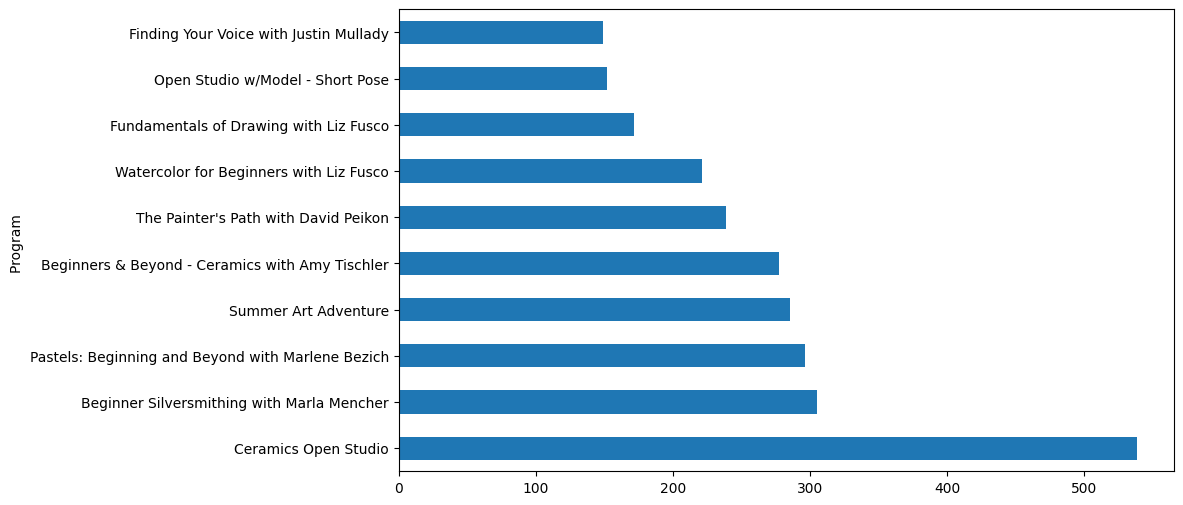

In [ ]:
df.groupby('program_title').size().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6))